For this phase we are assigned to do EDA, data cleaning and do some visualization through data cleaning, in my coding and parsing I did most of the data cleaning such as filling all NAN with zeroes, but there are more data, like data type, and etc, need to be consider in this phase. 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

%matplotlib inline

AS always Lets read our Data, The data that I already saved in csv from phase one. These data been seprated and parsed during crawling.

In [4]:
%matplotlib inline
from numpy import * # everything 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.options.display.max_rows = 10
car_df = pd.read_csv("result.csv")
car_df

,Year,Brand,Model,Title,Mile,Price,Transmition,EXT_COLOR,INT_COLOR,Derivtrain,zipcode
0,2007,Mazda,CX-7 Sport,USED,75218,5995,Automatic,White,Beige,FWD,92521
1,2017,Volvo,S90 T5 Momentum,VOLVO CERTIFIED,0,26000,Automatic,Blue,Orange,FWD,92521
2,2020,BMW,740i,NEW,0,93945,Automatic,Gray,Black,RWD,92521
3,2008,Chevrolet,Tahoe Hybrid,USED,95000,14499,CVT,Black,Beige,RWD,92521
4,2019,BMW,330i,NEW,0,46545,Automatic,Blue,Black,RWD,92521
...,...,...,...,...,...,...,...,...,...,...,...
29081,2015,Toyota,Avalon Hybrid XLE Premium,USED,57393,14999,CVT,Gray,Gray,FWD,89107
29082,2016,BMW,M235 i,USED,35782,20999,Manual,Blue,Black,RWD,89107
29083,2015,Hyundai,Azera Base,USED,64245,12999,Automatic,Black,Black,FWD,89107
29084,2020,Kia,Rio S,NEW,0,15476,CVT,Black,Black,FWD,89107


In this part, I'm going to set my data and sorted by brand name, which is more makes sense.


In [5]:
car_df.sort_values("Brand", axis = 0, ascending = True, inplace = True, na_position ='last')
car_df

,Year,Brand,Model,Title,Mile,Price,Transmition,EXT_COLOR,INT_COLOR,Derivtrain,zipcode
20531,2017,Acura,ILX Base,USED,37874,14495,Automatic,White,Black,FWD,66203
25553,2017,Acura,ILX Base,USED,37874,14495,Automatic,White,Black,FWD,89107
26508,2015,Acura,TLX V6 Advance,USED,29317,14969,Automatic,White,Gray,FWD,89107
5267,2016,Acura,ILX Technology Plus Package,USED,22732,13999,Automatic,White,Black,FWD,99115
20211,2019,Acura,MDX Sport Hybrid 3.0L w/Advance Package,USED,0,40945,Automatic,Black,Black,AWD,66203
...,...,...,...,...,...,...,...,...,...,...,...
16793,2012,smart,ForTwo Pure,USED,45872,7998,Automatic,White,Black,RWD,75207
12365,2013,smart,ForTwo Pure,USED,32272,5980,Automatic,Black,Black,RWD,11101
6707,2012,smart,ForTwo Pure,USED,45872,7998,Automatic,White,Black,RWD,99115
23491,2012,smart,ForTwo Pure,USED,45672,6980,Automatic,Blue,Black,RWD,66203


This data is tabular and includes:   

- Year  ->Car year
- Brand -> Brand who MakeCar
- Model ->Car Model
- Title -> is it brand new, used, or dealer certified
- Mile -> miles of used car, or 0 for new
- Price
- Transmission Type
- EXT_COLOR -> exterior color
- INT_COLOR -> interior color
- Derivtrain -> SUV, or sedan ...
- zipcode -> the specific car crawled from this zip code


Check to see what model type cars we have in our dataset. 

In [6]:
pd.options.display.max_rows = 11
car_df.Model.unique()

array(['ILX Base', 'TLX V6 Advance', 'ILX Technology Plus Package', ...,
       'ForTwo Passion', 'ForTwo Pure', 'ForTwo Electric Drive Passion'],
      dtype=object)

Let's see what is our car data years domain, and title of cars we have in our dataset.

In [5]:
print("Car Years domain: " ,sorted(car_df.Year.unique()))
print("Title of cars in data: " , (car_df.Title.unique()))

Car Years domain:  [1955, 1969, 1971, 1973, 1974, 1976, 1977, 1978, 1981, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
Title of cars in data:  ['USED' 'ACURA CERTIFIED' 'NEW' 'AUDI CERTIFIED' 'BMW CERTIFIED'
 'BUICK CERTIFIED' 'CADILLAC CERTIFIED' 'CHRYSLER CERTIFIED'
 'FERRARI CERTIFIED' 'HONDA CERTIFIED' 'INFINITI CERTIFIED'
 'LEXUS CERTIFIED' 'MINI CERTIFIED' 'MERCEDES-BENZ CERTIFIED'
 'NISSAN CERTIFIED' 'SUBARU CERTIFIED' 'TOYOTA CERTIFIED'
 'VOLKSWAGEN CERTIFIED' 'VOLVO CERTIFIED']


Now we need to see our data types and the column that need to change to float, or int, to do our comparison and visualization :


In [7]:
pd.options.display.max_rows = 11
print(car_df.dtypes)

Year            int64
Brand          object
Model          object
Title          object
Mile            int64
Price          object
Transmition    object
EXT_COLOR      object
INT_COLOR      object
Derivtrain     object
zipcode         int64
dtype: object


Here we need to change price data type from object to float which we can easily use it for our visualization :

In [8]:
car_df['Price'] = pd.to_numeric(car_df['Price'], errors='coerce')
car_df.Price.dtype

dtype('float64')

Lets print max & min car prices :

In [10]:
print ("max price:", car_df.Price.max(), "min price:", car_df.Price.min(), "mean price:", car_df.Price.mean() )

max price: 375000.0 min price: 999.0 mean price: 18846.22214197276


Here we can have a histogram of price range which would help us in visualization in the future :

/home/csmajs/hesma001/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/csmajs/hesma001/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


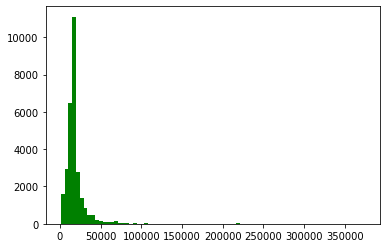

In [11]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# plot histogram 
n, bins, patches = plt.hist(car_df['Price'], 80, facecolor='green')
plt.show()

Now I'm going to visualize the year range of New, and cars with a histogram plot :


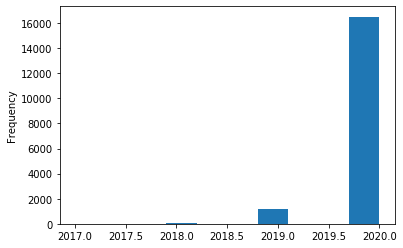

In [12]:
car_df[car_df.Title == "NEW"].Year.plot.hist()

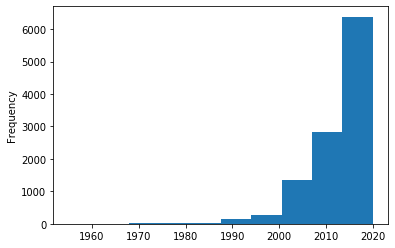

In [12]:
car_df[car_df.Title == "USED"].Year.plot.hist()

More makes sense now, the range that we have in our data for used cars are more from 2010 to 2020.


How about, we just take a look at and compare all cars model with a plot bar :


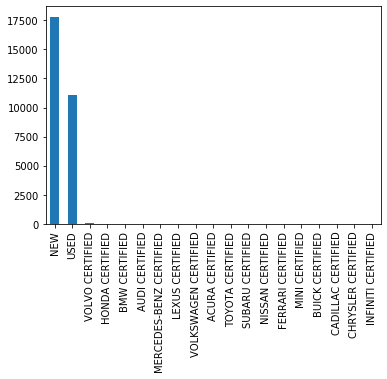

In [14]:
car_df["Title"].value_counts().plot.bar()

After checking our categories vs prices we can look at scatter of price vs year to find outliers : 

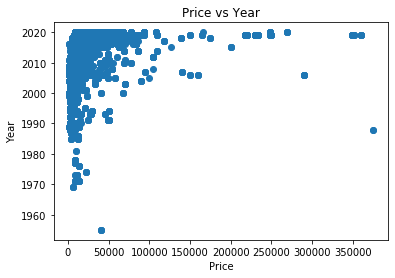

In [15]:
fig=plt.figure()
plt.scatter(car_df.Price, car_df.Year)
axis = fig.gca() #get current axis
axis.set_title('Price vs Year')
axis.set_xlabel('Price')
axis.set_ylabel('Year')
fig.canvas.draw()

Now lets have some boxplot to understand and visialization more on these two categories :

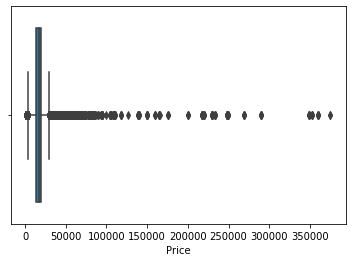

In [16]:
import seaborn as sns
sns.boxplot(x=car_df["Price"])

In [17]:
pd.options.display.max_rows = 16
print(car_df.loc[car_df['Price'].idxmax()])

Year                         1988
Brand                 Lamborghini
Model          Countach LP5000 QV
Title                        USED
Mile                         9960
Price                      375000
Transmition                Manual
EXT_COLOR                   Black
INT_COLOR                   Black
Derivtrain                    RWD
zipcode                     89107
Name: 26509, dtype: object


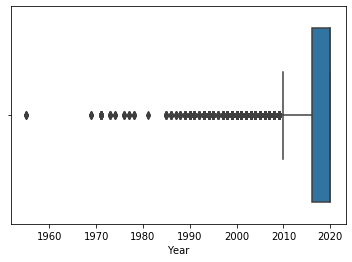

In [18]:
sns.boxplot(x=car_df["Year"])

In [19]:
pd.options.display.max_rows = 16
print(car_df.loc[car_df['Year'].idxmin()])

Year                          1955
Brand                         Ford
Model          Thunderbird Premium
Title                         USED
Mile                         78000
Price                        39995
Transmition              Automatic
EXT_COLOR                    Black
INT_COLOR                      Red
Derivtrain                     RWD
zipcode                      11101
Name: 14025, dtype: object


I found the car which is too old, and outline of our data, we don't need this since the quantity of this car is low, and does not affect our prediction in the future, or in a better way, helps our prediction.


In [20]:
car_df = car_df[car_df.Year > 1955]

as you can see we can drop this car, or in a better way any car older than that!

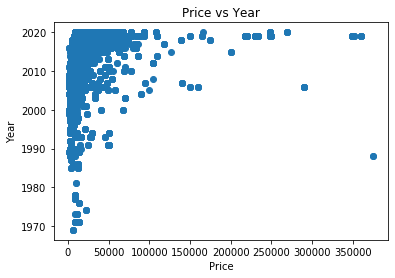

In [21]:
fig=plt.figure()
plt.scatter(car_df.Price, car_df.Year)
axis = fig.gca() #get current axis
axis.set_title('Price vs Year')
axis.set_xlabel('Price')
axis.set_ylabel('Year')
fig.canvas.draw()

Here we can see our outliers in the scater plot, and we can go ahead and remove them from our data :

In [26]:
car_df = car_df[car_df.Price < 280000]

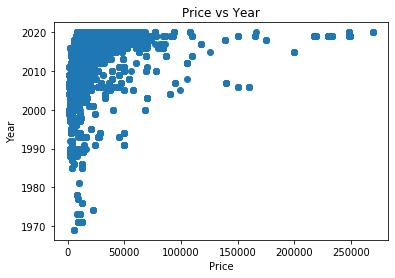

In [27]:
fig=plt.figure()
plt.scatter(car_df.Price, car_df.Year)
axis = fig.gca() #get current axis
axis.set_title('Price vs Year')
axis.set_xlabel('Price')
axis.set_ylabel('Year')
fig.canvas.draw()

Here we are, now we have better data, we more accuracy. 


In [29]:
car_df['Brand'].value_counts()

Chevrolet      14592
Nissan          3126
Ford            1506
Hyundai          821
Dodge            686
               ...  
MG                 8
Oldsmobile         8
Plymouth           8
Geo                6
Rolls-Royce        5
Name: Brand, Length: 53, dtype: int64

In [30]:
car_df.head()

,Year,Brand,Model,Title,Mile,Price,Transmition,EXT_COLOR,INT_COLOR,Derivtrain,zipcode
20531,2017,Acura,ILX Base,USED,37874,14495.0,Automatic,White,Black,FWD,66203
25553,2017,Acura,ILX Base,USED,37874,14495.0,Automatic,White,Black,FWD,89107
26508,2015,Acura,TLX V6 Advance,USED,29317,14969.0,Automatic,White,Gray,FWD,89107
5267,2016,Acura,ILX Technology Plus Package,USED,22732,13999.0,Automatic,White,Black,FWD,99115
20211,2019,Acura,MDX Sport Hybrid 3.0L w/Advance Package,USED,0,40945.0,Automatic,Black,Black,AWD,66203


In [32]:
new_car_df = car_df[['Year', 'Mile', 'Price' ,'Brand']].copy()
new_car_df

,Year,Mile,Price,Brand
20531,2017,37874,14495.0,Acura
25553,2017,37874,14495.0,Acura
26508,2015,29317,14969.0,Acura
5267,2016,22732,13999.0,Acura
20211,2019,0,40945.0,Acura
...,...,...,...,...
16793,2012,45872,7998.0,smart
12365,2013,32272,5980.0,smart
6707,2012,45872,7998.0,smart
23491,2012,45672,6980.0,smart


In [33]:
brand_df = new_car_df['Brand'].value_counts()
year_df = new_car_df['Year'].value_counts()
mile_df = new_car_df['Mile'].value_counts()
brand_df

Chevrolet      14592
Nissan          3126
Ford            1506
Hyundai          821
Dodge            686
               ...  
MG                 8
Oldsmobile         8
Plymouth           8
Geo                6
Rolls-Royce        5
Name: Brand, Length: 53, dtype: int64

How about just compare all brand and see which brand have more, this would show us the brand popularity as well. 


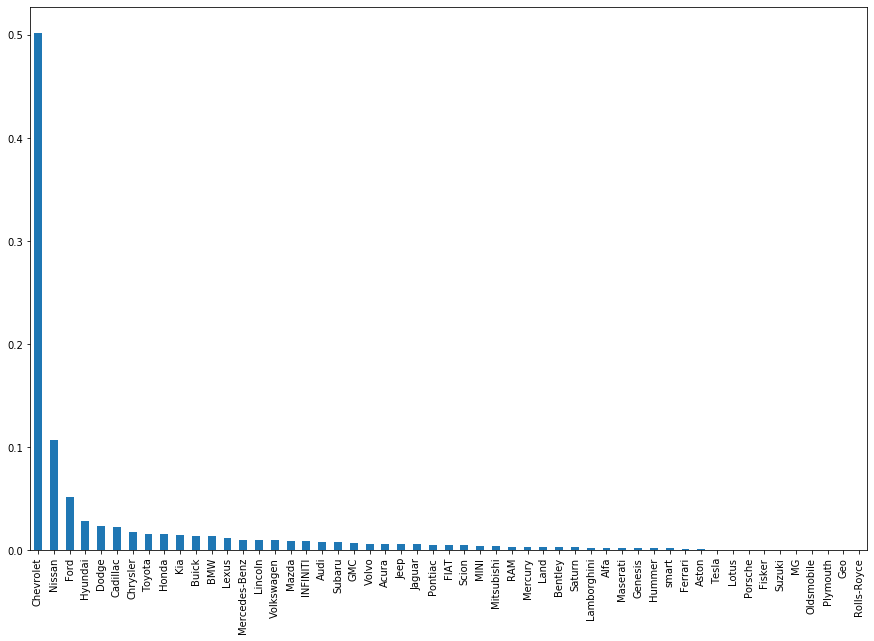

In [34]:
(new_car_df['Brand'].value_counts()/brand_df.sum()).plot.bar(figsize=(15,10))

Chevrolet has a much larger amount compared to other brands, might happen, because Chevrolet has more different types of car or model, but we do have some other brands, like for that have the same amount of car model. Therefore, Chevrolet has more popularity in our dataset. 


In [36]:
df = new_car_df.groupby(['Brand']).get_group('Chevrolet')
df

,Year,Mile,Price,Brand
25568,2020,0,12979.0,Chevrolet
14650,2020,0,21325.0,Chevrolet
14651,2020,0,20847.0,Chevrolet
11130,2020,0,16277.0,Chevrolet
11128,2020,0,16664.0,Chevrolet
...,...,...,...,...
750,2020,0,18318.0,Chevrolet
7941,2020,0,13998.0,Chevrolet
7901,2017,31074,22299.0,Chevrolet
7954,2020,0,18180.0,Chevrolet


In [37]:
grp = new_car_df.groupby('Brand') 
df_n = grp.filter(lambda x: len(x) >= 400)
df_n['Brand'].value_counts()

Chevrolet    14592
Nissan        3126
Ford          1506
Hyundai        821
Dodge          686
Cadillac       652
Chrysler       506
Toyota         467
Honda          462
Kia            430
Buick          420
Name: Brand, dtype: int64

Now let’s look at the Transmission type and see if we need to do some data cleaning here. 


In [38]:
car_df['Transmition'].value_counts()

Automatic          19835
CVT                 7840
Manual              1229
Other / Unknown       86
Automanual            58
Name: Transmition, dtype: int64

The Other / Unknown, and Automanual have much fewer cars than others in our dataset, we can drop these two from our data.


In [39]:
cols = ['Transmition']

for column in cols:
    car_df.loc[car_df[column] == 'Automanual', column] = np.nan
    car_df.dropna(axis = 0, inplace = True)

In [40]:
car_df['Transmition'].value_counts()

Automatic          19827
CVT                 7840
Manual              1217
Other / Unknown       86
Name: Transmition, dtype: int64

In [41]:
cols = ['Transmition']

for column in cols:
    car_df.loc[car_df[column] == 'Other / Unknown', column] = np.nan
    car_df.dropna(axis = 0, inplace = True)
car_df['Transmition'].value_counts()

Automatic    19827
CVT           7840
Manual        1217
Name: Transmition, dtype: int64

In [42]:
Trans = {'Automatic':'Automatic', 'CVT':'CVT', 'Manual':'Manual'}
car_df['Transmition'] = [Trans[x] for x in car_df['Transmition']]
car_df['Transmition'].value_counts()

Automatic    19827
CVT           7840
Manual        1217
Name: Transmition, dtype: int64

Here now we can have box plot to visualize these tree different Transmission.


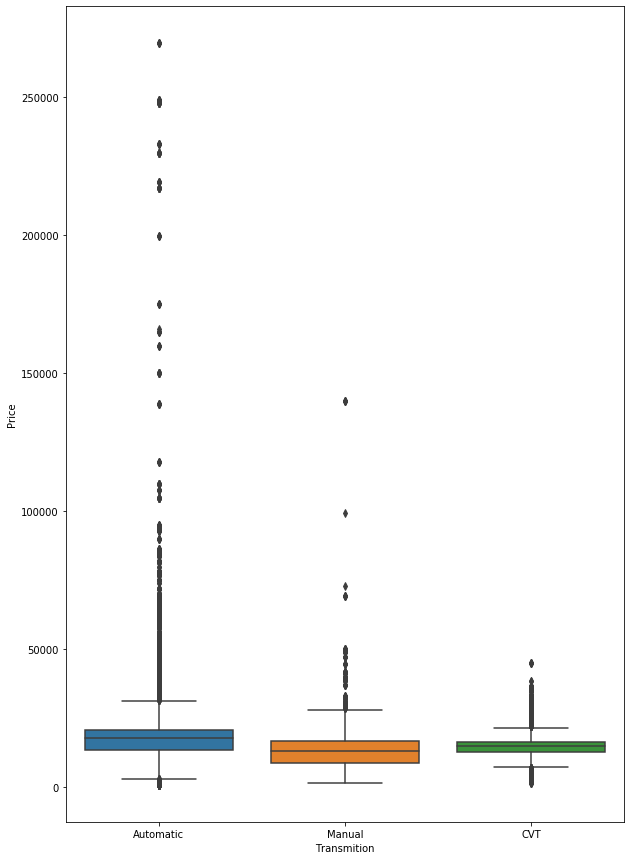

In [43]:
fig, ax = plt.subplots(figsize=(10,15))  
def plot_box(car_df, col, col_y = 'Price'):
    sns.set_style("whitegrid")
    sns.boxplot(col, col_y, data=car_df)
    plt.xlabel(col) # Set text for the x axis
    plt.ylabel(col_y)# Set text for y axis
    plt.show()
    
plot_box(car_df, 'Transmition')   

we have more cars with Automatic Transmission and also Automatic Transmission appears in the bigger price range compare to Manual and CVT. 


We also can take look at the price, which is the first and last, most important part, when we want to buy a car. 


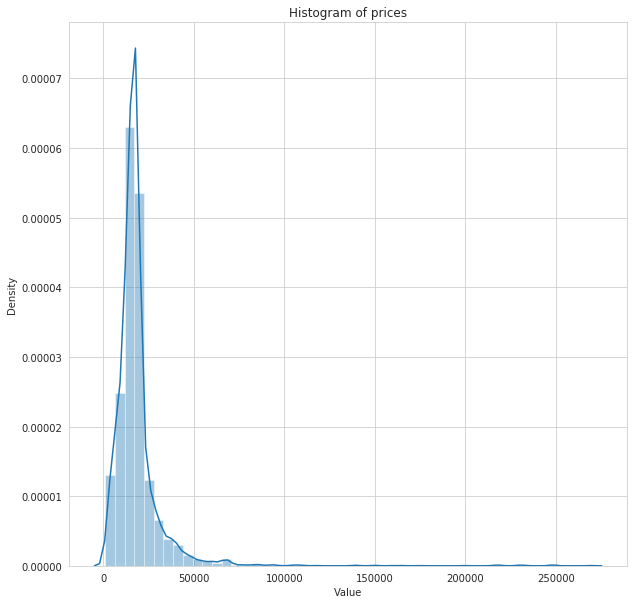

In [44]:
fig, ax = plt.subplots(figsize=(10,10))  
def hist_plot(vals, lab):
    ## Distribution plot of values
    sns.distplot(vals)
    plt.title('Histogram of ' + lab)
    plt.xlabel('Value')
    plt.ylabel('Density')
    
#labels = np.array(auto_prices['price'])
hist_plot(car_df['Price'], 'prices')

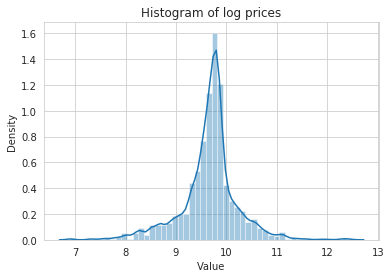

In [45]:
car_df['log_price'] = np.log(car_df['Price'])
hist_plot(car_df['log_price'], 'log prices')

Derivtrain, explain the type of car, 
- FWD -> Front-wheel drive : most of the sedan cars are this type. also some of SUVs 
- AWD -> All-wheel drive : most of the SUV's and sport cars.
- RWD -> Rear-wheel drive : Most of the sports cars, and muscle cars.
- 4x4/4-wheel drive : for SUV, and Trucks.

In [47]:
car_df['Derivtrain'].value_counts()

FWD                  20938
AWD                   3859
RWD                   2778
4x4/4-wheel drive     1211
Unknown                 72
4x2/2-wheel drive       26
Name: Derivtrain, dtype: int64

Here we need to drop, Unknown type cars, and 4x2/2-wheel drive because they are too low numbers compare to others in our dataset.


In [48]:
cols = ['Derivtrain']

for column in cols:
    car_df.loc[car_df[column] == 'Unknown', column] = np.nan
    car_df.dropna(axis = 0, inplace = True)
car_df['Derivtrain'].value_counts()

FWD                  20938
AWD                   3859
RWD                   2778
4x4/4-wheel drive     1211
4x2/2-wheel drive       26
Name: Derivtrain, dtype: int64

In [49]:
cols = ['Derivtrain']

for column in cols:
    car_df.loc[car_df[column] == '4x2/2-wheel drive', column] = np.nan
    car_df.dropna(axis = 0, inplace = True)
car_df['Derivtrain'].value_counts()

FWD                  20938
AWD                   3859
RWD                   2778
4x4/4-wheel drive     1211
Name: Derivtrain, dtype: int64

Now lets look how does this transformation change the relationship between the label (price) and some of the features : 

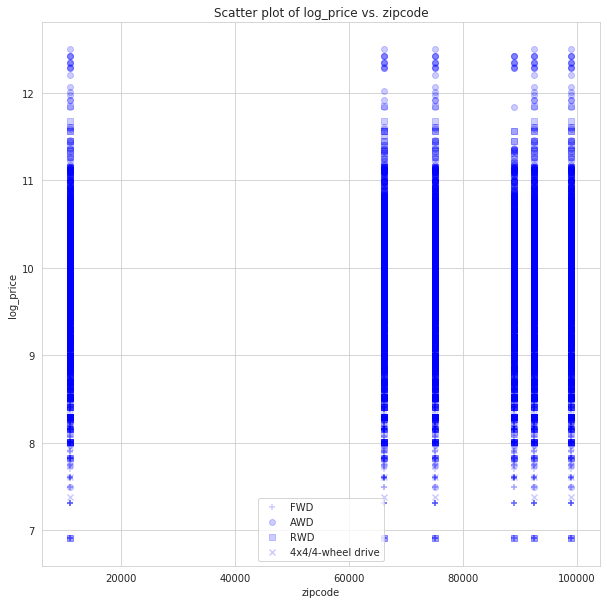

In [50]:
fig, ax = plt.subplots(figsize=(10,10))  
def plot_scatter_shape(car_df, cols, shape_col = 'Derivtrain', col_y = 'log_price', alpha = 0.2):
    shapes = ['+', 'o', 's', 'x', '^'] # pick distinctive shapes
    unique_cats = car_df[shape_col].unique()
    for col in cols: # loop over the columns to plot
        sns.set_style("whitegrid")
        for i, cat in enumerate(unique_cats): # loop over the unique categories
            temp = car_df[car_df[shape_col] == cat]
            sns.regplot(col, col_y, data=temp, marker = shapes[i], label = cat,
                        scatter_kws={"alpha":alpha}, fit_reg = False, color = 'blue')
        plt.title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.legend()
        plt.show()
            
num_cols = ['zipcode']
plot_scatter_shape(car_df, num_cols)   

It's a pretty interesting result! they are straight in the scatter plot of log price, vs the zip codes that would show us the frequency that type of cars appears in the specific zip code!
I think it's time to save our data into a new CVS file for the next phase which is phase3. 

